In [3]:
import spacy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Game Tweets.csv to Game Tweets.csv


In [6]:
df = pd.read_csv('Game Tweets.csv')
df.head()

,ID,Name,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df.shape

(51335, 4)

In [8]:
df.columns

Index(['ID', 'Name', 'Sentiment', 'Tweet'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51335 entries, 0 to 51334
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         51335 non-null  int64 
 1   Name       51335 non-null  object
 2   Sentiment  51335 non-null  object
 3   Tweet      50896 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [10]:
df.isna().sum()

,0
ID,0
Name,0
Sentiment,0
Tweet,439


In [11]:
df.duplicated().sum()

np.int64(1885)

In [12]:
df

,ID,Name,Sentiment,Tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
51330,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point ift.tt /...
51331,11200,TomClancysGhostRecon,Neutral,Tom Clancy's Ghost Recon: Choke Point i.tt / 3...
51332,11200,TomClancysGhostRecon,Neutral,Tom lin Ghost Recon: Choke Point ift.tt/36QWteH
51333,11200,TomClancysGhostRecon,Neutral,In Tom Clancy'A s The Ghost House Recon : Chok...


In [13]:
df['Sentiment'].value_counts()

,count
Sentiment,
Negative,15678
Positive,15251
Neutral,10908
Irrelevant,9498


<ipython-input-14-9dcd0823f740>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data = df, x = 'Sentiment', palette = 'Set2')


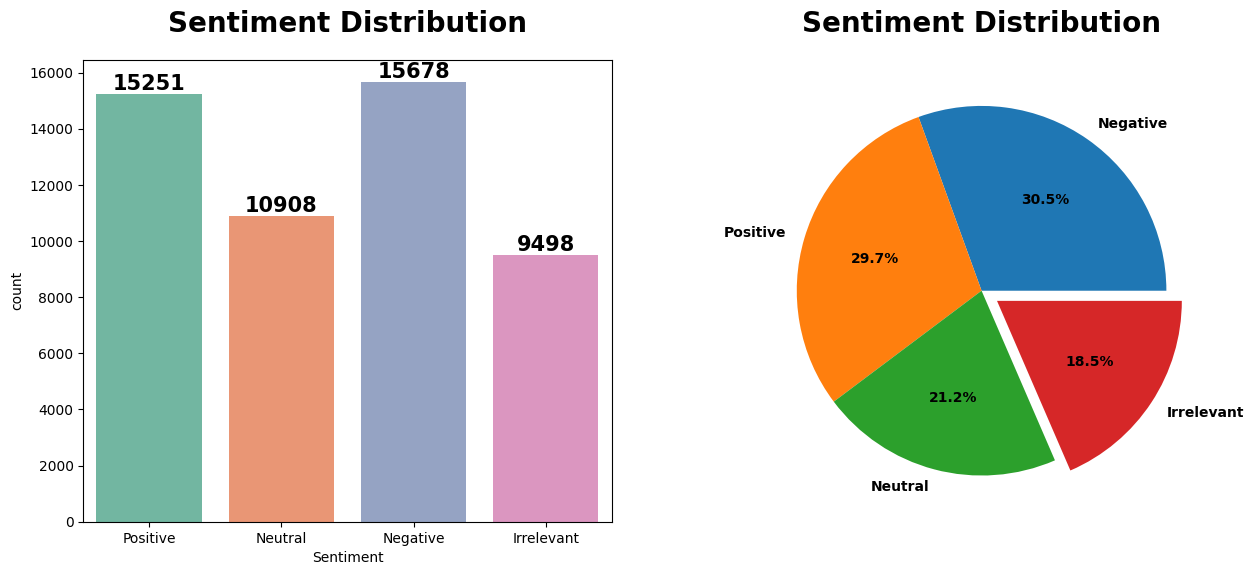

In [14]:
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
ax = sns.countplot(data = df, x = 'Sentiment', palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container, fontweight = 'black', size = 15)
plt.title("Sentiment Distribution", fontweight = 'black', size = 20, pad = 20)


plt.subplot(1,2,2)
plt.pie(df['Sentiment'].value_counts(), autopct = '%1.1f%%', labels = df['Sentiment'].value_counts().index, explode = [0,0,0,0.1],colors=sns.set_palette("Set2"), textprops={"fontweight":"black"})
plt.title("Sentiment Distribution", fontweight = 'black', size = 20, pad = 20)

plt.show()

In [15]:
df['Name'].value_counts()

,count
Name,
TomClancysRainbowSix,2400
MaddenNFL,2400
CallOfDuty,2394
LeagueOfLegends,2394
CallOfDutyBlackopsColdWar,2376
ApexLegends,2376
WorldOfCraft,2364
Dota2,2364
NBA2K,2352


<ipython-input-16-efbb74a777c6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Name'].value_counts().values, y = df['Name'].value_counts().index, palette = 'viridis')


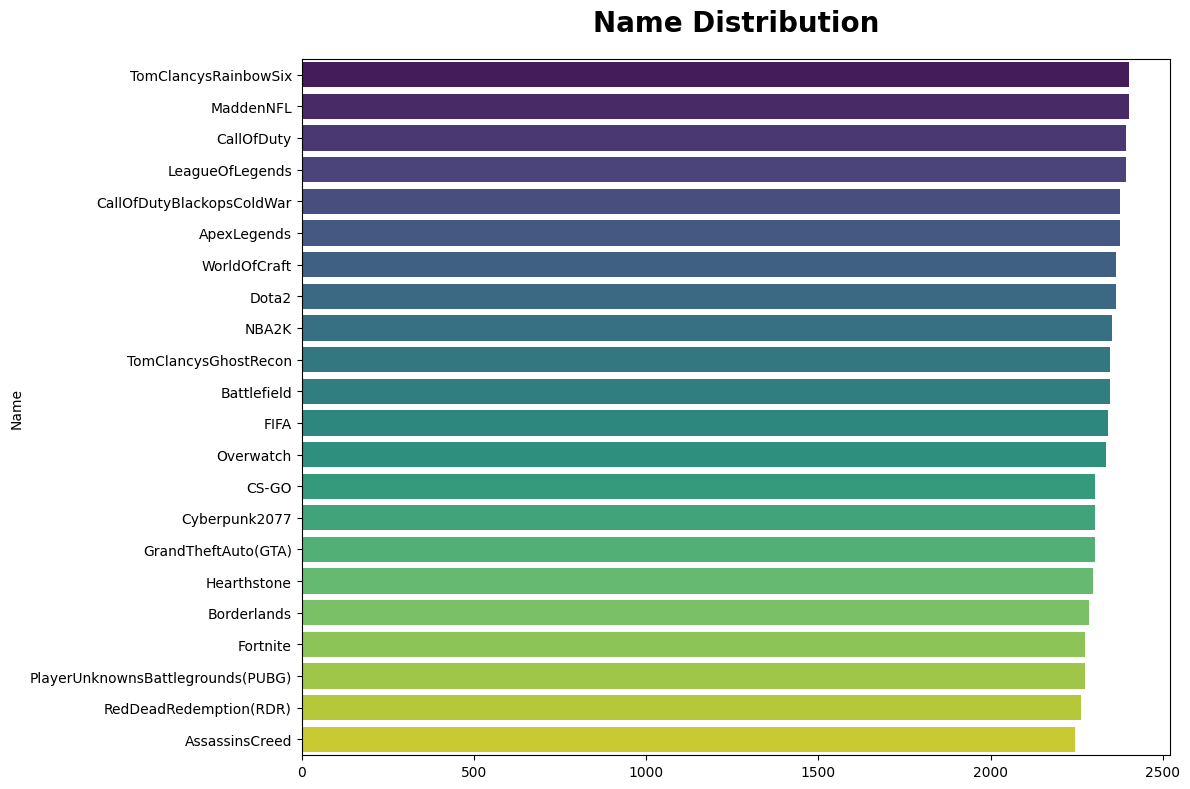

In [16]:
plt.figure(figsize = (12, 8))
sns.barplot(x = df['Name'].value_counts().values, y = df['Name'].value_counts().index, palette = 'viridis')
plt.title("Name Distribution", fontweight = 'black', size = 20, pad = 20)

plt.tight_layout()
plt.show()

In [17]:
df.dropna(inplace = True)

In [18]:
df.isna().sum()

,0
ID,0
Name,0
Sentiment,0
Tweet,0


In [19]:
nlp = spacy.load('en_core_web_sm')

In [20]:
def preprocessing(text):
    doc = nlp(text)
    cleaned_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue

        else:
            cleaned_tokens.append(token.lemma_)

    return " ".join(cleaned_tokens)

In [21]:
df['cleaned_text'] = df['Tweet'].apply(preprocessing)

In [22]:
df.head()

,ID,Name,Sentiment,Tweet,cleaned_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,m get borderland murder


In [23]:
df['Combined_Text'] = df['cleaned_text'] + ' ' + df['Name']

In [24]:
encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['Sentiment'])

In [25]:
df.head()

,ID,Name,Sentiment,Tweet,cleaned_text,Combined_Text,label
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill,come border kill Borderlands,3
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill,m get borderland kill Borderlands,3
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder,m come borderland murder Borderlands,3
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder,m get borderland 2 murder Borderlands,3
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,m get borderland murder,m get borderland murder Borderlands,3


In [26]:
X = df['Combined_Text']
y = df['label']

In [27]:
tfidf = TfidfVectorizer()

X_vectorized = tfidf.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = 0.2, random_state = 42)

In [29]:
X_train.shape

(40716, 20306)

In [30]:
y_train.shape

(40716,)

In [31]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
lr.score(X_train, y_train)

0.8673494449356518

In [33]:
y_pred = lr.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8086444007858546

<Axes: >

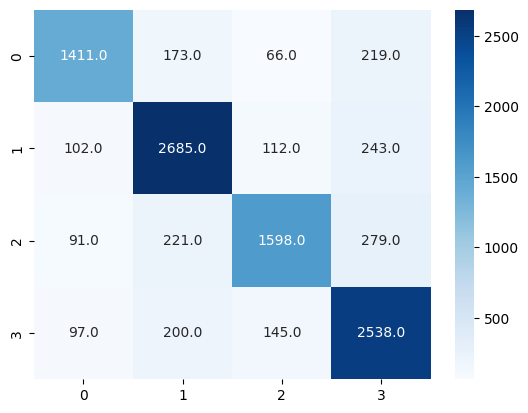

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1869
           1       0.82      0.85      0.84      3142
           2       0.83      0.73      0.78      2189
           3       0.77      0.85      0.81      2980

    accuracy                           0.81     10180
   macro avg       0.81      0.80      0.80     10180
weighted avg       0.81      0.81      0.81     10180



In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_train, y_train)

0.980081540426368

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9392927308447937

<Axes: >

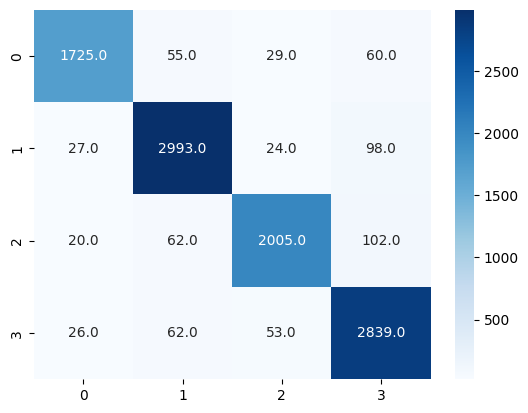

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True,fmt ='0.1f', cmap = 'Blues')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       232
           1       0.96      0.88      0.92       148
           2       0.94      0.93      0.94       169
           3       0.88      0.97      0.92       366

    accuracy                           0.92       915
   macro avg       0.94      0.91      0.92       915
weighted avg       0.93      0.92      0.92       915



svm

In [ ]:
le_model = LabelEncoder()
df['Sentiment'] = le_model.fit_transform(df['Sentiment'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment'],
                                                    test_size=0.2, random_state=42, stratify=df['Sentiment'])

In [ ]:
from sklearn.svm import SVC
clf = Pipeline([
    ('vectorizer_tri_grams', TfidfVectorizer()),
    ('svm', SVC(kernel='linear'))
])

In [ ]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tri_grams', TfidfVectorizer()),
                ('svm', SVC(kernel='linear'))])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.926775956284153


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       222
           1       0.95      0.92      0.93       165
           2       0.94      0.90      0.92       184
           3       0.90      0.96      0.93       344

    accuracy                           0.93       915
   macro avg       0.93      0.92      0.93       915
weighted avg       0.93      0.93      0.93       915



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
import string

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, Dropout, Dense, GlobalAveragePooling1D, Bidirectional, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score ,classification_report ,roc_curve, auc ,precision_recall_curve
from sklearn.model_selection import train_test_split

import pickle
import joblib

* Read data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv to twitter_training.csv
Saving Game Tweets.csv to Game Tweets.csv


In [4]:
train_data =pd.read_csv('Game Tweets.csv', names=['number' , 'Border' , 'label' , 'text'] )
test_data =pd.read_csv('twitter_training.csv', names=['number' , 'Border' , 'label' , 'text'])
train_data.shape, test_data.shape

((51336, 4), (74682, 4))

In [5]:
train_data.head()

,number,Border,label,text
0,ID,Name,Sentiment,Tweet
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


* **I will Drop `'number', 'Border'` Columns**

In [6]:
train_data.drop(['number', 'Border'], axis= 1, inplace= True)
test_data.drop(['number', 'Border'], axis= 1, inplace= True)
train_data.head()

,label,text
0,Sentiment,Tweet
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
train_data.isna().sum()

,0
label,0
text,439


* Remove Nulls

In [8]:
train_data.dropna(axis=0, inplace= True)

In [9]:
train_data.duplicated().sum()

np.int64(2950)

- Remove Duplication

In [10]:
train_data.drop_duplicates(inplace= True)

In [11]:
train_data.shape

(47947, 2)

In [12]:
train_data['label'].value_counts()

,count
label,
Negative,14783
Positive,14043
Neutral,10088
Irrelevant,9032
Sentiment,1


<Axes: ylabel='count'>

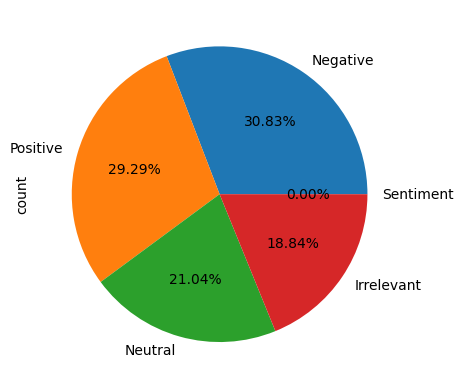

In [13]:
train_data['label'].value_counts().plot.pie(autopct='%2.2f%%')

- I Will use only positive and negative text

In [14]:
train_data = train_data[train_data['label'].isin(['Positive', 'Negative'])]

In [15]:
train_data['label'].value_counts()

,count
label,
Negative,14783
Positive,14043


<Axes: ylabel='count'>

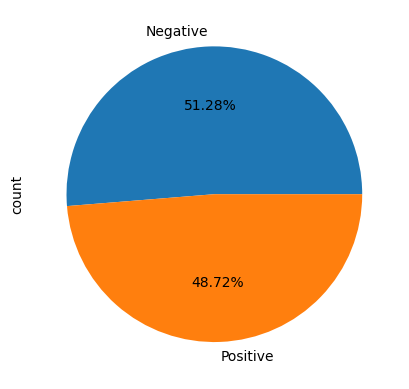

In [16]:
train_data['label'].value_counts().plot.pie(autopct='%2.2f%%')

## Preprocessing

In [17]:
embedding_dim =128
oov_tok ='<OOV>'
training_portion = .8
max_length =150

In [18]:
train_data['text'][10]

"2010 So I spent a few hours making something for fun. . . If you don't know I am a HUGE RhandlerR fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg"

- **Data Cleaning**

In [19]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [20]:
punc =string.punctuation
st_words =stopwords.words('english')
print(st_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [21]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer




def clean_text (text):

    text = re.sub('@ ?[\w]+', '', text)
    text = re.sub('https?://\S+|www\.\S+' ,' ',text)
    text = re.sub('\w*gmail.com\b|\w*yahoo.co.in\b' ,' ',text)
    text = re.sub('<.*>', '', text)
    text = re.sub('[\W]',' ', text)
    text = re.sub('[0-9]',' ', text)
    #remove single character
    text = re.sub('\s+[a-zA-Z]\s+',' ', text)
    #removeing multiple spaces
    text = re.sub('\s+',' ', text)

    #tokens = word_tokenize(text)

    text=''.join([word.lower() for word in text if word not in punc])
    text =' '.join([word for word in text.split() if word not in st_words])


    return text



train_data['cleaned_text'] = train_data['text'].apply(lambda x: clean_text(x))

train_data.head(15)

,label,text,cleaned_text
1,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
4,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
5,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
6,Positive,So I spent a few hours making something for fu...,spent hours making something fun know huge fan...
7,Positive,So I spent a couple of hours doing something f...,spent couple hours something fun know huge fan...
8,Positive,So I spent a few hours doing something for fun...,spent hours something fun know huge fan maya o...
9,Positive,So I spent a few hours making something for fu...,spent hours making something fun know huge rha...
10,Positive,2010 So I spent a few hours making something f...,spent hours making something fun know huge rha...


In [23]:
from collections import Counter
word_count = Counter()

for text in train_data['cleaned_text']:
    for word in text.split():
        word_count[word] += 1

word_count.most_common(10)

[('game', 5752),
 ('com', 2491),
 ('like', 2108),
 ('play', 2062),
 ('pic', 1895),
 ('get', 1803),
 ('good', 1687),
 ('twitter', 1654),
 ('love', 1649),
 ('really', 1645)]

In [24]:
freq =set(word for (word ,wc) in word_count.most_common(5))
rare = set (word for (word ,wc) in word_count.most_common()[:-10:-1])
rare

{'amazires',
 'copyright',
 'duel',
 'duell',
 'electric',
 'felon',
 'rupture',
 'shouts',
 'spsxtik'}

In [25]:
train_data['label'].replace({'Positive':1, 'Negative':0}, inplace= True)

<ipython-input-25-c48686831f79>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['label'].replace({'Positive':1, 'Negative':0}, inplace= True)
<ipython-input-25-c48686831f79>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['label'].replace({'Positive':1, 'Negative':0}, inplace

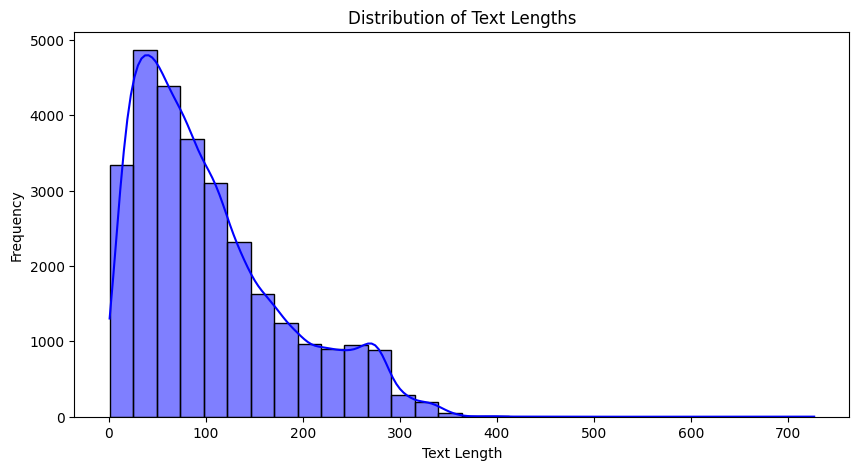

In [26]:
text_lengths = [len(text) for text in train_data['text']]

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(text_lengths, bins=30, kde=True, color='blue')

# Labels and title
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()


In [27]:
X = train_data['cleaned_text']
y = train_data['label']

In [28]:
tokenizer =Tokenizer( oov_token= oov_tok )
tokenizer.fit_on_texts(X)
word_indx =tokenizer.word_index

sequence = tokenizer.texts_to_sequences(X)
sequence_padded =pad_sequences(sequence, padding= 'post', maxlen= max_length)

In [29]:
vocab_size =len(word_indx)
vocab_size

13545

In [30]:
# print(word_indx)

In [31]:
word_indx['spent']

520

In [32]:
print((X[10]))
print((sequence[10]))
print((sequence_padded[10]))

spent hours making something fun know huge rhandlerr fan maya one favorite characters decided make wallpaper pc original image versus creation made enjoy pic twitter com mlsi wf jg
[]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


- save tokenizer

In [33]:
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

- Spilit text into train and validation

In [34]:
X_train, X_val, y_train, y_val = train_test_split(sequence_padded, y, test_size=0.2, random_state=42)

print('train_sentence length :',len(X_train))
print('train_labels length :',len(y_train))
print('test_sentence length :',len(X_val))
print('test_labels length :',len(y_val))

train_sentence length : 23060
train_labels length : 23060
test_sentence length : 5766
test_labels length : 5766


## Modle

In [35]:
model =Sequential([
    Embedding(vocab_size +1, embedding_dim, input_length= max_length),

    Bidirectional(LSTM(64, return_sequences=True, dropout = 0.2 , recurrent_dropout = 0.2)),

    Bidirectional(LSTM(32, dropout = 0.2 , recurrent_dropout = 0.2)),


    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.build(input_shape=(None, max_length))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 150, 128)       │     1,733,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 150, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,876,033 (7.16 MB)

 Trainable params: 1,876,033 (7.16 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history =model.fit(X_train, y_train, batch_size=64, epochs= 10, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 321s 849ms/step - accuracy: 0.7205 - loss: 0.5055 - val_accuracy: 0.9195 - val_loss: 0.1993
Epoch 2/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 320s 844ms/step - accuracy: 0.9461 - loss: 0.1364 - val_accuracy: 0.9388 - val_loss: 0.1645
Epoch 3/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 306s 847ms/step - accuracy: 0.9685 - loss: 0.0825 - val_accuracy: 0.9396 - val_loss: 0.1491
Epoch 4/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 322s 847ms/step - accuracy: 0.9769 - loss: 0.0587 - val_accuracy: 0.9442 - val_loss: 0.1608
Epoch 5/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 315s 873ms/step - accuracy: 0.9778 - loss: 0.0499 - val_accuracy: 0.9417 - val_loss: 0.1693
Epoch 6/10
361/361 ━━━━━━━━━━━━━━━━━━━━ 312s 845ms/step - accuracy: 0.9803 - loss: 0.0430 - val_accuracy: 0.9468 - val_loss: 0.1752


In [37]:
model.save('sentiment_analysis_model.keras')

In [38]:
accur, loss =model.evaluate(X_val, y_val)

print('test accuracy is :',accur)
print('test loss is :',loss)

181/181 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.9370 - loss: 0.1553
test accuracy is : 0.14906786382198334
test loss is : 0.9396461844444275


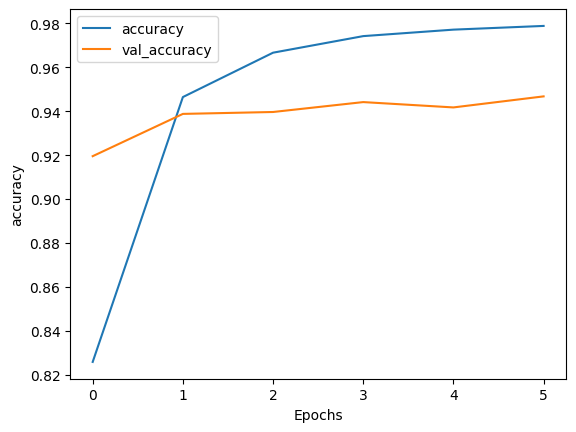

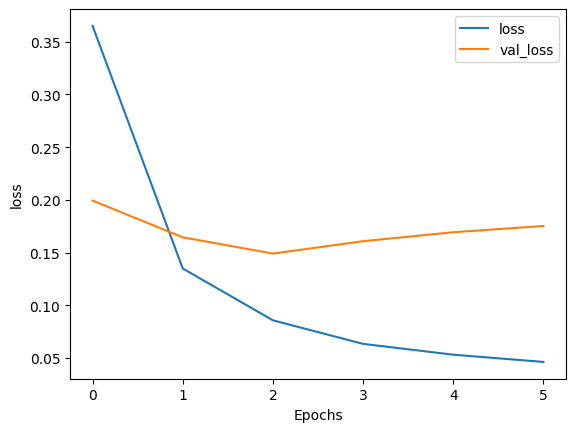

In [39]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+ string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+ string ])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

- **Confusion Matrix**

181/181 ━━━━━━━━━━━━━━━━━━━━ 25s 125ms/step


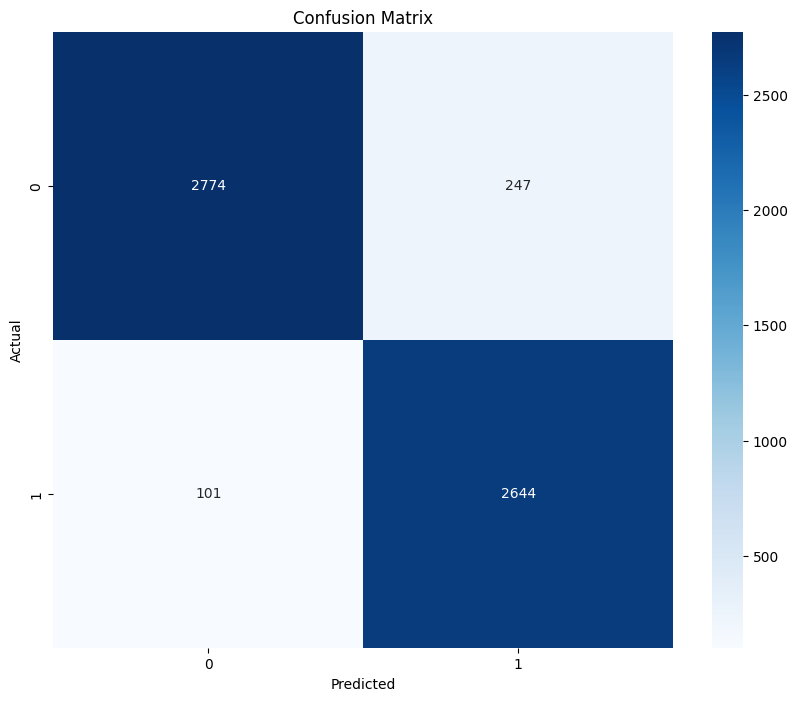

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)


conf_matrix = confusion_matrix(y_val, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- **Classification Report**

In [41]:
y_pred.max()

np.float32(0.99938554)

In [42]:
y_pred_classes = np.array(y_pred_classes)

# Convert class labels to strings
target_names = [str(label) for label in np.unique(y)]

# Generate classification report
class_report = classification_report(y_val, y_pred_classes, target_names=target_names)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      3021
           1       0.91      0.96      0.94      2745

    accuracy                           0.94      5766
   macro avg       0.94      0.94      0.94      5766
weighted avg       0.94      0.94      0.94      5766



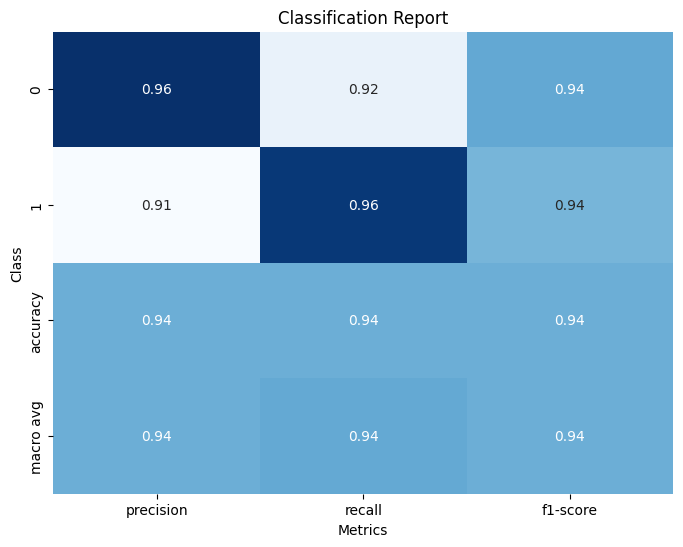

In [43]:
report = classification_report(y_val, y_pred_classes, target_names=np.unique(y), output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.title('Classification Report' )
plt.show()